# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

Saat ini data memainkan peran yang sangat penting setiap setiap harinya. Data dapat dimanfaatkan menjadi sebuah model yang memberikan insight kepada pengolahnya.Tetapi, model apapun yang dibuat dengan data yang buruk akan menghasilkan hasil yang tidak memuaskan. Untuk dapat menghasilkan model yang baik, perlu adanya proses yang dilakukan. Sebelum itu bagaimana cara kita mencari dan mendapatkan data yang akan kita olah atau proses? Salah satunya dapat kita gunakan teknik Webscrapping. Dalam hal ini akan dilakukan webscrapping ke salah satu situs web yaitu https://www.exchange-rates.org/history/IDR/USD/T. DImana akan mengambil Data Kurs  Indonesia Rupiah (IDR) per US Dolar (USD) serta akan dilakukan visualisasi.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title><!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\r\n<script type="text/javascript" async=true>\r\n(function() {\r\n  var host = window.location.hostname;\r\n  var element = document.createElement(\'script\');\r\n  var firstScript = document.getElementsByTagName(\'script\')[0];\r\n  var url = \'https://quantcast.mgr.consensu.org\'\r\n    .concat(\'/choice/\', \'8V5d7LJYEMQpZ\', \'/\', host, \'/choice.js\')\r\n  var uspTries = 0;\r\n  var uspTriesLimit = 3;\r\n  element.async = true;\r\n  element.type ='

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

What we need is from the website is the date and the corresponding exchange rate. Data ini ditabulasi dalam table dengan table *class* `table table-striped table-hover table-hover-solid-row table-simple history-data`. Kita bisa memasukkan variabel tersebut sebagai parameter untuk `.find()` 

In [4]:
table = soup.find('table', 
                    attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-5-2021">
     USD IDR rate for 3/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3


Seperti yang bisa kita lihat di atas, table berisi banyak baris (<tr>). Kita dapat mengekstrak semua baris ini menggunakan perintah  `find_all()` dengan parameter `tr`.

In [5]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>]

    Perhatikan bahwa setiap baris berisi 4 cells:
    - 1st cell: date
    - 2nd cell: name of day
    - 3rd cell: exchange rate
    - 4th cell: remarks

Dalam hal ini data yang kita butuhkan adalah data `date` dan `exchange rate`, kita dapat mengekstraknya dengan memanggil index `[0]` untuk `date` dan `[2]` untuk `exchange rate` setelah menggunakan perintah `find_all()` pada masing-masing pemanggilan. Digunakan juga perintah untuk mengubah data ini menjadi string dengan perintah `.text`.



In [6]:
temp = [] #initiating a tuple

for i in range(len(tr)):
    row = table.find_all('tr')[i]
    if len(row) == 4:
        #get period
        period = row.find_all('td')[0].text
        period = period.strip() #for removing the excess whitespace

        #get ex_rate
        ex_rate = row.find_all('td')[2].text
        ex_rate = ex_rate.strip() #for removing the excess whitespace
    
    temp.append((period, ex_rate))
    
temp

[('3/5/2021', '14,292.17893 IDR'),
 ('3/4/2021', '14,261.85426 IDR'),
 ('3/3/2021', '14,257.29443 IDR'),
 ('3/2/2021', '14,256.28041 IDR'),
 ('3/1/2021', '14,248.60576 IDR'),
 ('2/26/2021', '14,300.27815 IDR'),
 ('2/25/2021', '14,139.73096 IDR'),
 ('2/24/2021', '14,083.03673 IDR'),
 ('2/23/2021', '14,092.64503 IDR'),
 ('2/22/2021', '14,118.07274 IDR'),
 ('2/19/2021', '14,066.79375 IDR'),
 ('2/18/2021', '14,013.51318 IDR'),
 ('2/18/2021', '14,013.51318 IDR'),
 ('2/17/2021', '14,015.16095 IDR'),
 ('2/16/2021', '13,935.96629 IDR'),
 ('2/15/2021', '13,918.18725 IDR'),
 ('2/12/2021', '13,988.54710 IDR'),
 ('2/11/2021', '13,982.27900 IDR'),
 ('2/10/2021', '13,994.09212 IDR'),
 ('2/9/2021', '13,920.52018 IDR'),
 ('2/8/2021', '14,007.25257 IDR'),
 ('2/5/2021', '14,008.99630 IDR'),
 ('2/4/2021', '14,020.87878 IDR'),
 ('2/3/2021', '13,997.60682 IDR'),
 ('2/2/2021', '14,004.60175 IDR'),
 ('2/1/2021', '14,025.27450 IDR'),
 ('1/29/2021', '14,027.32457 IDR'),
 ('1/28/2021', '14,048.06146 IDR'),
 ('1

Data tersebut disimpan dalam objek `temp`. Pada saat dijalankan data tersebut dimulai dari tanggal saat ini (terbaru) hingga masa lampau. Untuk dapat membalikan tanggal tersebut digunakan perintah `temp[:: -1]` 

In [7]:
temp = temp[::-1]
print(temp[:10])
len(temp)

[('9/6/2020', '14,754.95155 IDR'), ('9/7/2020', '14,743.92989 IDR'), ('9/8/2020', '14,839.54267 IDR'), ('9/9/2020', '14,783.50009 IDR'), ('9/10/2020', '14,871.58664 IDR'), ('9/11/2020', '14,865.27553 IDR'), ('9/13/2020', '14,876.45021 IDR'), ('9/14/2020', '14,864.65988 IDR'), ('9/15/2020', '14,843.44670 IDR'), ('9/16/2020', '14,807.88761 IDR')]


136

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd
# import numpy as np
# import sys

df = pd.DataFrame(temp, columns = ('date', 'exchange_rate'))
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           136 non-null    object
 1   exchange_rate  136 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB
None


,date,exchange_rate
0,9/6/2020,"14,754.95155 IDR"
1,9/7/2020,"14,743.92989 IDR"
2,9/8/2020,"14,839.54267 IDR"
3,9/9/2020,"14,783.50009 IDR"
4,9/10/2020,"14,871.58664 IDR"


Selanjutnya dilakukakn data cleaning (pembersihan data yang tidak sesuai). Dalam hal ini :
- Tipe data `date` adalah object, sehingga perlu dirubah menjadi `datetime64` agar dapat diproses sebagai data tanggal
- Menghapus teks IDR pada kolom `exchange_rate` menggunakan `.split('')` lalu mengambil object pertama dari daftar yang dihasilkan

In [9]:
df['date'] = df['date'].astype('datetime64')
df['exchange_rate'] = df['exchange_rate'].apply(lambda x: x.split(' ')[0])

- Hapus koma `,` dari nilai yang merepresentasikan desimal pada `exchange_rate`
- Tipe data `exchange_rate` adalah object, sehingga perlu diruubah menjadi `float` agar menjadi data bertipe numeric

In [10]:
df['exchange_rate'] = df['exchange_rate'].str.replace(',', '')
df['exchange_rate'] = df['exchange_rate'].astype(float)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           136 non-null    datetime64[ns]
 1   exchange_rate  136 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB
None


,date,exchange_rate
0,2020-09-06,14754.95155
1,2020-09-07,14743.92989
2,2020-09-08,14839.54267
3,2020-09-09,14783.50009
4,2020-09-10,14871.58664


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

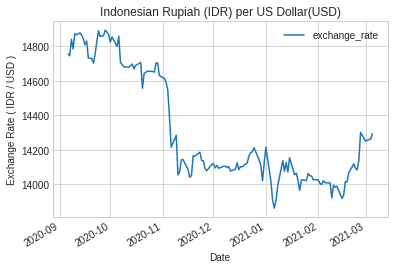

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df.set_index('date').plot()
plt.legend()
plt.title('Indonesian Rupiah (IDR) per US Dollar(USD)')
plt.ylabel('Exchange Rate ( IDR / USD )')
plt.xlabel('Date')
plt.show()

Dari visualisasi yang didapatkan, diperoleh insight dimana pada bulan September 2020 relatif stabil. Di bulan Oktober 2020 mengalami penurunan hingga pada awal bulan November terjadi penurunan yang cukup besar nilai tukar IDR terhadap USD yang mengalami fluktuasi. Pada Desember 2020 nilai tukar (kurs) relatif stabil di Rp 14100 / USD, hingga pada bulan Januari 2021 terjadi fluktuasi dan sampai bulan Februari 2021 mengalami penurunan, kemudian naik hingga 14292 / USD hingga hari ini.

In [12]:
# Minimal Rate
min_rate = df['exchange_rate'].min()
print(f"Min Rate: IDR {min_rate} on {df.loc[df['exchange_rate'] == min_rate, 'date'].astype(str).values}")

# Average Rate
avg_rate = df['exchange_rate'].mean()
print(f"Avg Rate: IDR {avg_rate}")

# Maximum Rate
max_rate = df['exchange_rate'].max()
print(f"Max Rate: IDR {max_rate} on {df.loc[df['exchange_rate'] == max_rate, 'date'].astype(str).values}")

Min Rate: IDR 13861.51463 on ['2021-01-06']
Avg Rate: IDR 14317.62609014705
Max Rate: IDR 14892.32194 on ['2020-09-28']


Dapat kita lihat pula, nilai tukar `exchange_rate` terendah terjadi pada tanggal 06 Januari 2021 sebesar 13861.51 IDR/USD dan `exchange_rate` terbesar terjadi pada tanggal 28 September 2020 sebesar 14892.32 IDR/USD. Secara rata-rata, `exchange_rate` selama periode 06 September 2020 hingga 05 Maret 2021 adalah 14317.63 IDR/USD. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.